<a href="https://colab.research.google.com/github/joannyp/TCC-Disaster-/blob/main/Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=9b706b14504546e17444af64d35e6d9f437e4e4714802c3af9af0adbec714fe2
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [ ]:
import os
import pandas as pd
import re
import emoji
import string
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter

# 1 Carregando os dados

In [ ]:
path = '/content/drive/MyDrive/TCC_Disaster'
os.chdir(path)

In [ ]:
df = pd.read_csv('DATASET.csv')
df

,date,id_str,user_name,text,time,latitude,longitude
0,2018-05-06,2.379071e+09,tiedyehobo,majic sands beach kona hawaiiawesome tunes car...,20:41:33,19.594333,-155.971728
1,2018-05-06,2.929292e+07,queeraspoetry,good 🤙 🌋 center spiritual living hawai,20:33:41,19.560340,-154.986600
2,2018-05-06,8.149151e+17,Hazards_Network,monday january an earthquake magnitude shook k...,20:30:04,19.078167,-155.187667
3,2018-05-06,4.142280e+08,NaomiCooper808,vacay ladat waimea hawaii county hawai,20:09:43,20.020278,-155.667778
4,2018-05-06,2.011251e+07,vioart527,last sunset hawaii next time,19:46:08,19.650000,-155.994000
...,...,...,...,...,...,...,...
6018,2018-04-29,1.446640e+07,MauiBenjamin,lahaina sunday lahaina hawai,21:43:25,20.886100,-156.675000
6019,2018-04-29,3.048545e+09,googuns_lulz,becbefbfdaadeaaaebadbedbbeccdfcdcfffecbbecdc,21:31:00,19.277470,-153.229383
6020,2018-04-29,2.927180e+08,barkingbbq,for last day brunch favorite place maui vacati...,21:27:53,20.944502,-156.691695
6021,2018-04-29,8.743629e+17,lifted_karma,i absolutely love switch blaze vape battery th...,21:27:01,20.906560,-156.243140


# 2 Limpeza dos dados

In [ ]:
def remove_numbers(text):
  return re.sub(r'\d+', '', text)

In [ ]:
def remove_emojis(text):
  return emoji.replace_emoji(text)

In [ ]:
def remove_dots(text):
  return re.compile(f'[{re.escape(string.punctuation)}]').sub(' ', text)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  make_tokenize = TweetTokenizer()
  tokens = make_tokenize.tokenize( remove_dots( remove_numbers(remove_emojis(text) ) ))
  return [w.lower() for w in tokens if not w in stop_words]

In [ ]:
df['text'][1]

'good 🤙 🌋 center spiritual living hawai'

In [ ]:
remove_stopwords(df['text'][1])

['good', 'center', 'spiritual', 'living', 'hawai']

In [ ]:
for i in df.index:
  newText = remove_stopwords(str(df['text'][i]))
  df['text'][i] = newText

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,date,id_str,user_name,text,time,latitude,longitude
0,2018-05-06,2.379071e+09,tiedyehobo,"[majic, sands, beach, kona, hawaiiawesome, tun...",20:41:33,19.594333,-155.971728
1,2018-05-06,2.929292e+07,queeraspoetry,"[good, center, spiritual, living, hawai]",20:33:41,19.560340,-154.986600
2,2018-05-06,8.149151e+17,Hazards_Network,"[monday, january, earthquake, magnitude, shook...",20:30:04,19.078167,-155.187667
3,2018-05-06,4.142280e+08,NaomiCooper808,"[vacay, ladat, waimea, hawaii, county, hawai]",20:09:43,20.020278,-155.667778
4,2018-05-06,2.011251e+07,vioart527,"[last, sunset, hawaii, next, time]",19:46:08,19.650000,-155.994000
...,...,...,...,...,...,...,...
6018,2018-04-29,1.446640e+07,MauiBenjamin,"[lahaina, sunday, lahaina, hawai]",21:43:25,20.886100,-156.675000
6019,2018-04-29,3.048545e+09,googuns_lulz,[becbefbfdaadeaaaebadbedbbeccdfcdcfffecbbecdc],21:31:00,19.277470,-153.229383
6020,2018-04-29,2.927180e+08,barkingbbq,"[last, day, brunch, favorite, place, maui, vac...",21:27:53,20.944502,-156.691695
6021,2018-04-29,8.743629e+17,lifted_karma,"[absolutely, love, switch, blaze, vape, batter...",21:27:01,20.906560,-156.243140


# 3 Filtragem dos dados


In [ ]:
def read_words():
  arq = open('path_dic_words.txt').readlines()
  text = " ".join(arq).replace(',',' ').lower().split(' ')
  return sorted(set([x for x in text if len(x) > 1]))

In [ ]:
words = read_words()
print(words)

['abandon', 'active', 'active_fault', 'administration', 'administrators', 'adversity', 'afraid', 'aftershocks', 'aghast', 'aid', 'airfall', 'aliment', 'alimentchow', 'allowance', 'amplitude', 'andesite', 'annihilated', 'anxious', 'apartment', 'appeal', 'apprehensive', 'ash', 'ashes', 'ashfall', 'assistance', 'asthenosphere', 'asylum', 'bail_out', 'basalt', 'begging', 'bench', 'block', 'bomb', 'broken', 'calamity', 'caldera', 'careful', 'cataclysm', 'catastrophe', 'celsius', 'central_vent', 'central_volcano', 'charity', 'chow', 'cinder', 'cinder\n', 'cinder_cone', 'clearance', 'clinic', 'comestible', 'concerned', 'concerns', 'condo', 'conduit', 'cone', 'contribution', 'convulsion', 'coulee', 'crater', 'craving', 'crisis', 'crowd', 'dacite', 'danger', 'death', 'deformation', 'demolished', 'destroyed', 'devastated', 'difficulty', 'direction', 'directors', 'disaster', 'disasters', 'disintegrated', 'displace', 'distress', 'distressed', 'disturbed', 'donations', 'dwelling', 'earthquake', 'ej

In [ ]:
df['interest'] = 0
df['keywords'] = ''
for i in df.index:
  result = list(set(df['text'][i]).intersection(words))
  if len(result) > 0:
    df['interest'][i] = 1
    df['keywords'][i] = result

In [ ]:
df['interest'].value_counts()

0    3674
1    2349
Name: interest, dtype: int64

In [ ]:
cond = df['interest']==1
filtered_df = df[cond]
del filtered_df['interest'] #excluir coluna
filtered_df

,date,id_str,user_name,text,time,latitude,longitude,keywords
2,2018-05-06,8.149151e+17,Hazards_Network,"[monday, january, earthquake, magnitude, shook...",20:30:04,19.078167,-155.187667,"[magnitude, earthquake, shook]"
6,2018-05-06,1.864570e+07,syvideo,"[adventures, covering, lava, flow, hilo, hi, l...",18:18:05,19.473500,-154.920000,"[flow, leilani, lava]"
9,2018-05-06,1.714726e+09,itsnotben,"[hawaii, round, hours, airplane, earthquakes, ...",17:38:12,19.431649,-155.216870,"[volcano, eruptions]"
10,2018-05-06,2.918153e+09,eq_map_es,"[【, 】, isla, de, hawaii, hawaii, km, utc, sism...",13:30:49,19.046000,-155.173000,"[terremoto, sismo]"
14,2018-05-06,8.149151e+17,Hazards_Network,"[monday, january, earthquake, magnitude, shook...",08:20:04,19.371334,-155.033829,"[leilani, magnitude, earthquake, shook]"
...,...,...,...,...,...,...,...,...
5963,2018-04-30,1.553489e+08,Joechris1988,"[one, time, volcano, set, sky, fire, cooled, s...",03:00:23,19.566667,-155.500000,"[volcano, fire]"
5967,2018-04-30,3.625236e+08,QuakesToday,"[magnitude, earthquake, km, pāhala, hi, united...",02:35:04,19.195000,-155.416000,"[magnitude, earthquake]"
5990,2018-04-29,3.625236e+08,QuakesToday,"[magnitude, earthquake, km, volcano, hi, unite...",23:45:05,19.381000,-155.242000,"[volcano, magnitude, earthquake]"
5994,2018-04-29,3.625236e+08,QuakesToday,"[magnitude, earthquake, km, fern, acres, hi, u...",23:25:05,19.381000,-155.087000,"[magnitude, earthquake]"


In [ ]:
filtered_df.to_csv('dataset_processed.csv',index=False) #csv
#df.to_json('dataset.json', orient='index') #json

# 4 Palavras-chave mais utilizadas

In [ ]:
keywords = filtered_df['keywords'].to_list()
keywordsAll = [item for sublista in keywords for item in sublista]

In [ ]:
keywordsCount = dict(Counter(keywordsAll)) #frequencia das palavras

In [ ]:
#selecionar as 10 mais utilizadas
j = 0
keywordsCount2 = dict()
for i in sorted(keywordsCount, key = keywordsCount.get, reverse=True):
  if j < 10:
    keywordsCount2[i] = keywordsCount[i]
    j+=1

In [ ]:
keywordsCount2

{'earthquake': 1662,
 'magnitude': 1399,
 'volcano': 662,
 'leilani': 545,
 'sismo': 293,
 'shook': 269,
 'terremoto': 258,
 'lava': 70,
 'kilauea': 43,
 'store': 41}

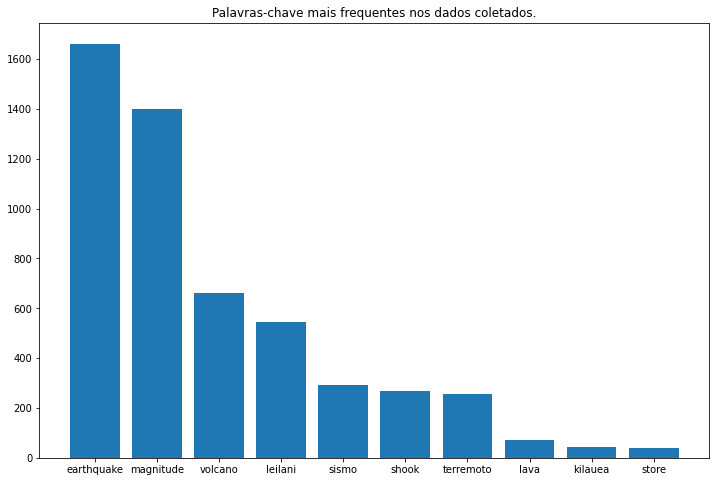

In [ ]:
plt.figure(figsize=(12, 8)) 
plt.bar(list(keywordsCount2.keys()), list(keywordsCount2.values()))
plt.title('Palavras-chave mais frequentes nos dados coletados.')
plt.savefig('grafico.png')
plt.savefig('grafico.svg')
plt.show()